In [1]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import random
import matplotlib.pyplot as plt

# For Variable Number of SFC Requests

In [2]:
num_edges = 82
num_nodes = 48
oper_costs = range(5,11)
num_cnfNumber = 4
end_delays = range(30,51)
cpu_bounds = range(10,15+1)           #(4,6+1)
bandwidth_bounds = range(4,6+1)
cnfCPU = {1 : 14.32 , 2 : 15.25, 3 : 13.87, 4 : 13.27, 0: 14}
EdgeList=[(0, 1), (1, 2), (0, 3), (0, 2), (1, 7), (2, 5), (3, 4), (3, 10), (4, 5), (4, 6), (5, 9),
          (5, 12), (6, 7), (7, 8), (8, 11), (8, 13), (8, 9), (10, 11), (10, 13), (11, 12), (12, 13)]
L = {
    (0,1):1,
    (1,2):3,
    (0,3):3,
    (0,2): 2,
    (1,7): 7,
    (2,5): 4,
    (3,4): 3,
    (3,10): 8,
    (4,5): 0,
    (4,6): 2,
    (5,9): 6,
    (5,12): 8,
    (6,7): 2,
    (7,8): 2,
    (8,11): 5,
    (8,13): 5,
    (8,9): 6,
    (10,11): 4,
    (10,13): 6,
    (11,12): 6,
    (12,13): 1
}

init_cpu = 100
init_bandwidth = 100

In [3]:
EdgeList=[(1,2),
(1,3),
(2,3),
(2,5),
(3,5),
(3,4),
(5,6),
(4,6),
(5,16),
(6,16),
(4,7),
(4,8),
(7,16),
(7,9),
(9,8),
(8,12),
(8,11),
(9,11),
(9,10),
(11,12),
(10,11),
(12,13),
(11,13),
(13,15),
(13,14),
(14,15),
(10,14),
(15,23),
(14,20),
(10,21),
(20,23),
(10,16),
(16,17),
(16,21),
(20,21),
(17,18),
(17,21),
(21,24),
(20,24),
(23,24),
(18,19),
(19,27),
(22,24),
(22,26),
(24,25),
(25,26),
(25,31),
(25,30),
(26,27),
(27,30),
(28,30),
(27,28),
(27,32),
(27,29),
(28,29),
(28,31),
(29,34),
(37,38),
(34,38),
(31,37),
(37,40),
(38,40),
(32,34),
(38,39),
(34,35),
(32,33),
(39,40),
(33,36),
(35,36),
(35,39),
(39,45),
(36,41),
(41,45),
(41,42),
(41,44),
(44,45),
(45,46),
(42,43),
(44,47),
(46,47),
(43,48),
(47,48)]

L = {(1, 2): 1.5884322210000001,
 (1, 3): 1.366945662,
 (2, 3): 0.5950783458000001,
 (2, 5): 0.6067530891999999,
 (3, 5): 0.42462709319999997,
 (3, 4): 0.6120901147,
 (5, 6): 0.7058216254,
 (4, 6): 0.2038076622,
 (5, 16): 0.9106299799,
 (6, 16): 0.623764858,
 (4, 7): 0.2635156352,
 (4, 8): 0.8185662896,
 (7, 16): 0.6007489355,
 (7, 9): 0.5447101675,
 (9, 8): 0.31888727499999997,
 (8, 12): 0.4252942214,
 (8, 11): 0.3902699914,
 (9, 11): 0.2641827634,
 (9, 10): 0.35524576139999997,
 (11, 12): 0.2204858669,
 (10, 11): 0.2491723791,
 (12, 13): 0.1307571253,
 (11, 13): 0.1010699208,
 (13, 15): 0.09606645942,
 (13, 14): 0.1581093811,
 (14, 15): 0.1217508947,
 (10, 14): 0.3215557878,
 (15, 23): 0.5050160401,
 (14, 20): 0.2892000705,
 (10, 21): 0.3916042478,
 (20, 23): 0.4082824525,
 (10, 16): 0.7635282139,
 (16, 17): 0.8475863658999999,
 (16, 21): 0.7048209332,
 (20, 21): 0.5470451161,
 (17, 18): 0.1981370725,
 (17, 21): 0.6431115755,
 (21, 24): 0.8365787508,
 (20, 24): 0.8766064422,
 (23, 24): 0.6197620889000001,
 (18, 19): 0.255843661,
 (19, 27): 0.49400842500000003,
 (22, 24): 0.1010699208,
 (22, 26): 0.3579142741,
 (24, 25): 0.2218201233,
 (25, 26): 0.28152809630000003,
 (25, 31): 1.2188432040000001,
 (25, 30): 0.2985398652,
 (26, 27): 0.03335640952,
 (27, 30): 0.13909622770000002,
 (28, 30): 0.1734533295,
 (27, 28): 0.13008999710000002,
 (27, 32): 0.8455849813,
 (27, 29): 0.2581786097,
 (28, 29): 0.12308515109999998,
 (28, 31): 0.2538422764,
 (29, 34): 0.4783309125,
 (37, 38): 0.24850525089999997,
 (34, 38): 0.2394990204,
 (31, 37): 0.2194851746,
 (37, 40): 0.5226949371999999,
 (38, 40): 0.5313676036999999,
 (32, 34): 0.472993887,
 (38, 39): 0.6484486011,
 (34, 35): 0.5380388856,
 (32, 33): 0.4056139398,
 (39, 40): 0.8379130070999999,
 (33, 36): 0.8555919042,
 (35, 36): 0.44297311840000003,
 (35, 39): 0.22081943099999998,
 (39, 45): 0.5553842185,
 (36, 41): 0.49334129679999994,
 (41, 45): 0.662124729,
 (41, 42): 0.178790355,
 (41, 44): 0.3949398887,
 (44, 45): 0.4936748609,
 (45, 46): 0.6904776771,
 (42, 43): 0.33456478749999996,
 (44, 47): 0.5687267823000001,
 (46, 47): 0.41995719589999997,
 (43, 48): 2.5284158420000002,
 (47, 48): 2.247221309}

In [4]:
num_sfcRequests = 100+1
max_num_sfc_req = num_sfcRequests
init_operationalCost = [ random.choice(oper_costs) for i in range(num_nodes)]
# init_operationalCost = [10, 5, 8, 5, 6, 8, 10, 6, 9, 5, 7, 8, 5, 9]
init_endDelay = [random.choice(end_delays) for i in range(num_sfcRequests)]
init_bandwidthReq = [random.choice(bandwidth_bounds) for i in range(num_sfcRequests)]

init_cpuReq = {}
for i in range(num_sfcRequests):
    for j in range(num_cnfNumber):
        try:
            init_cpuReq[i,j] = cnfCPU[j]
        except:
            init_cpuReq[i,j] = random.choice(cpu_bounds)

init_endDelays = init_endDelay
init_bandwidthReqs = init_bandwidthReq 
init_cpuReqs = init_cpuReq
OperationalCosts = {}


for num_sfcRequests in reversed(range(1,max_num_sfc_req)):
    init_endDelay = init_endDelays[0:num_sfcRequests]
    init_bandwidthReq = init_bandwidthReqs[0:num_sfcRequests]
    init_cpuReq = {}
    for i in range(num_sfcRequests):
        for j in range(num_cnfNumber):
            init_cpuReq[i,j] = init_cpuReqs[i,j]
    model = pyo.ConcreteModel()

    model.set_cnfNumber = pyo.RangeSet(0,num_cnfNumber-1) # j {0,1,2,3,4}
    model.set_sfcRequests = pyo.RangeSet(0,num_sfcRequests-1) # i {0,1,2} 

    # 14 nodes and 21 edges - NSFNET
    model.set_nodes = pyo.RangeSet(0,num_nodes-1) # v (0,1,...,13)
    model.set_edges = pyo.RangeSet(0,num_edges-1) # (u,v) (0,1,...,21)

    # Variables and Parameters

    # L - to be done

    model.y = pyo.Var(model.set_sfcRequests, model.set_cnfNumber,model.set_nodes,domain=pyo.Binary)

    model.z = pyo.Var(model.set_sfcRequests, model.set_edges, domain=pyo.Binary)

    model.C = pyo.Param(model.set_nodes, initialize=init_cpu)

    model.B = pyo.Param(model.set_edges, initialize=init_bandwidth)

    model.W = pyo.Param(model.set_nodes, initialize=init_operationalCost)

    model.l = pyo.Param(model.set_sfcRequests, initialize=init_endDelay)

    model.c = pyo.Param(model.set_sfcRequests, model.set_cnfNumber, initialize=init_cpuReq)

    model.b = pyo.Param(model.set_sfcRequests, initialize=init_bandwidthReq)

    y = model.y
    z = model.z
    C = model.C
    B = model.B
    W = model.W
    l = model.l
    c = model.c
    b = model.b

    # Constraints

    model.cpuConstraint = pyo.ConstraintList()
    for v in range(num_nodes):
         model.cpuConstraint.add(
             expr=sum(sum(y[i,j,v]*c[i,j] for j in range(num_cnfNumber)) for i in range(num_sfcRequests)) <= C[v]
         )

    model.bandwidthConstraint = pyo.ConstraintList()
    for _,e in enumerate(EdgeList):
        model.bandwidthConstraint.add(
            expr=sum(z[i,_]*b[i] for i in range(num_sfcRequests)) <= B[_]
        )

    model.delayConstraint = pyo.ConstraintList()
    # for _,e in enumerate(EdgeList):
    for i in range(num_sfcRequests):
        model.delayConstraint.add(
            expr=sum(z[i,_]*L[EdgeList[_][0],EdgeList[_][1]] for _ in range(num_edges)) <= l[i]
        )
        
    model.placementConstraint = pyo.ConstraintList()
    for i in range(num_sfcRequests):
        for j in range(num_cnfNumber):
            model.placementConstraint.add(
                expr=sum(y[i,j,v] for v in range(num_nodes)) == 1
            )

    # Objective Function

    model.objective = pyo.Objective(
        expr=sum(
                sum(
                    sum(y[i,j,v]*c[i,j]*W[v] for v in range(num_nodes))
                    for j in range(num_cnfNumber)
                )
            for i in range(num_sfcRequests)
        ), sense=minimize
    )

    # Solving the Model using IBM Cplex

    optimizer = SolverFactory('cplex')

    optimizer.solve(model)

    # Printing the outputs

    Oper_cost = sum(
                    sum(
                        sum(y[i,j,v]*c[i,j]*W[v] for v in range(num_nodes))
                        for j in range(num_cnfNumber)
                    )
                for i in range(num_sfcRequests)
        )

    print("Operational Cost of the current setting: ",pyo.value(Oper_cost))
    OperationalCosts[num_sfcRequests] = pyo.value(Oper_cost)
    
    
    print("================== ",num_sfcRequests," =================")
#     for i in range(num_sfcRequests):
#         for j in range(num_cnfNumber):
#             for v in range(num_nodes):
#                 if(pyo.value(y[i,j,v])):
#                     print(i,j,v)

Operational Cost of the current setting:  12418.566666666642
==================  100  =================
Operational Cost of the current setting:  12265.323333333312
==================  99  =================
Operational Cost of the current setting:  12112.063333333312
==================  98  =================
Operational Cost of the current setting:  11958.979999999996
==================  97  =================
Operational Cost of the current setting:  11805.699999999983
==================  96  =================
Operational Cost of the current setting:  11652.626666666652
==================  95  =================
Operational Cost of the current setting:  11499.356666666648
==================  94  =================
Operational Cost of the current setting:  11346.216666666642
==================  93  =================
Operational Cost of the current setting:  11193.02999999998
==================  92  =================
Operational Cost of the current setting:  11039.84333333331
=============

KeyboardInterrupt: 

In [5]:
OperationalCosts

{100: 12418.566666666642,
 99: 12265.323333333312,
 98: 12112.063333333312,
 97: 11958.979999999996,
 96: 11805.699999999983,
 95: 11652.626666666652,
 94: 11499.356666666648,
 93: 11346.216666666642,
 92: 11193.02999999998,
 91: 11039.84333333331,
 90: 10886.626666666649,
 89: 10733.493333333312,
 88: 10580.229999999994,
 87: 10427.10666666666}

In [18]:
plt.plot(OperationalCosts.keys(),OperationalCosts.values(),'-o')

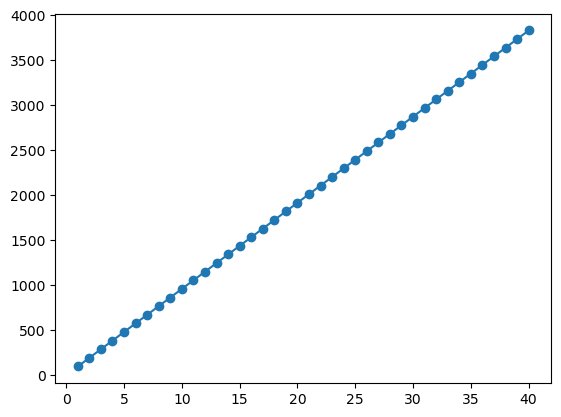

In [19]:
plt.show()

In [7]:
import pandas as pd
import time

In [ ]:
model.pprint()

In [8]:
def getOperationalCosts():
    num_sfcRequests = 40+1
    max_num_sfc_req = num_sfcRequests
    init_operationalCost = [ random.choice(oper_costs) for i in range(num_nodes)]
    # init_operationalCost = [10, 5, 8, 5, 6, 8, 10, 6, 9, 5, 7, 8, 5, 9]
    init_endDelay = [random.choice(end_delays) for i in range(num_sfcRequests)]
    init_bandwidthReq = [random.choice(bandwidth_bounds) for i in range(num_sfcRequests)]

    init_cpuReq = {}
    for i in range(num_sfcRequests):
        for j in range(num_cnfNumber):
            try:
                init_cpuReq[i,j] = cnfCPU[j]/3
            except:
                init_cpuReq[i,j] = random.choice(cpu_bounds)/3

    init_endDelays = init_endDelay
    init_bandwidthReqs = init_bandwidthReq 
    init_cpuReqs = init_cpuReq
    OperationalCosts = {}


    for num_sfcRequests in reversed(range(1,max_num_sfc_req)):
        init_endDelay = init_endDelays[0:num_sfcRequests]
        init_bandwidthReq = init_bandwidthReqs[0:num_sfcRequests]
        init_cpuReq = {}
        for i in range(num_sfcRequests):
            for j in range(num_cnfNumber):
                init_cpuReq[i,j] = init_cpuReqs[i,j]
        model = pyo.ConcreteModel()

        model.set_cnfNumber = pyo.RangeSet(0,num_cnfNumber-1) # j {0,1,2,3,4}
        model.set_sfcRequests = pyo.RangeSet(0,num_sfcRequests-1) # i {0,1,2} 

        # 14 nodes and 21 edges - NSFNET
        model.set_nodes = pyo.RangeSet(0,num_nodes-1) # v (0,1,...,13)
        model.set_edges = pyo.RangeSet(0,num_edges-1) # (u,v) (0,1,...,21)

        # Variables and Parameters

        # L - to be done

        model.y = pyo.Var(model.set_sfcRequests, model.set_cnfNumber,model.set_nodes,domain=pyo.Binary)

        model.z = pyo.Var(model.set_sfcRequests, model.set_edges, domain=pyo.Binary)

        model.C = pyo.Param(model.set_nodes, initialize=init_cpu)

        model.B = pyo.Param(model.set_edges, initialize=init_bandwidth)

        model.W = pyo.Param(model.set_nodes, initialize=init_operationalCost)

        model.l = pyo.Param(model.set_sfcRequests, initialize=init_endDelay)

        model.c = pyo.Param(model.set_sfcRequests, model.set_cnfNumber, initialize=init_cpuReq)

        model.b = pyo.Param(model.set_sfcRequests, initialize=init_bandwidthReq)

        y = model.y
        z = model.z
        C = model.C
        B = model.B
        W = model.W
        l = model.l
        c = model.c
        b = model.b

        # Constraints

        model.cpuConstraint = pyo.ConstraintList()
        for v in range(num_nodes):
             model.cpuConstraint.add(
                 expr=sum(sum(y[i,j,v]*c[i,j] for j in range(num_cnfNumber)) for i in range(num_sfcRequests)) <= C[v]
             )

        model.bandwidthConstraint = pyo.ConstraintList()
        for _,e in enumerate(EdgeList):
            model.bandwidthConstraint.add(
                expr=sum(z[i,_]*b[i] for i in range(num_sfcRequests)) <= B[_]
            )

        model.delayConstraint = pyo.ConstraintList()
        # for _,e in enumerate(EdgeList):
        for i in range(num_sfcRequests):
            model.delayConstraint.add(
                expr=sum(z[i,_]*L[EdgeList[_][0],EdgeList[_][1]] for _ in range(num_edges)) <= l[i]
            )

        model.placementConstraint = pyo.ConstraintList()
        for i in range(num_sfcRequests):
            for j in range(num_cnfNumber):
                model.placementConstraint.add(
                    expr=sum(y[i,j,v] for v in range(num_nodes)) == 1
                )

        # Objective Function

        model.objective = pyo.Objective(
            expr=sum(
                    sum(
                        sum(y[i,j,v]*c[i,j]*W[v] for v in range(num_nodes))
                        for j in range(num_cnfNumber)
                    )
                for i in range(num_sfcRequests)
            ), sense=minimize
        )

        # Solving the Model using IBM Cplex

        optimizer = SolverFactory('cplex')

        optimizer.solve(model)

        # Printing the outputs

        Oper_cost = sum(
                        sum(
                            sum(y[i,j,v]*c[i,j]*W[v] for v in range(num_nodes))
                            for j in range(num_cnfNumber)
                        )
                    for i in range(num_sfcRequests)
            )

        # print("Operational Cost of the current setting: ",pyo.value(Oper_cost))
        OperationalCosts[num_sfcRequests] = pyo.value(Oper_cost)


        # print("================== ",num_sfcRequests," =================")
    return OperationalCosts
        
    '''
        for i in range(num_sfcRequests):
            for j in range(num_cnfNumber):
                for v in range(num_nodes):
                    if(pyo.value(y[i,j,v])):
                        print(i,j,v)
    '''

In [13]:
trials = pd.DataFrame(OperationalCosts, index=[1])

In [14]:
trials

,40,39,38,37,36,35,34,33,32,31,...,10,9,8,7,6,5,4,3,2,1
1,3995.566667,3880.583333,3765.69,3650.89,3535.99,3421.056667,3306.25,3191.78,3077.336667,2967.733333,...,957.333333,861.6,765.866667,670.133333,574.4,478.666667,382.933333,287.2,191.466667,95.733333


In [ ]:
for i in range(1,2):
    strt = time.time()
    trials=trials.append(getOperationalCosts(),ignore_index=True)
    print("============",i,"============", time.time()-strt)

In [16]:
for i in range(1,99):
    time.sleep(14)
    strt = time.time()
    trials=trials.append(getOperationalCosts(),ignore_index=True)
    print("============",i,"============", time.time()-strt)

============ 1 ============ 47.08829116821289
============ 2 ============ 2124.776012659073
============ 3 ============ 33.60230374336243
============ 4 ============ 16.99902629852295
============ 5 ============ 17.896469831466675
============ 6 ============ 38.823277711868286
============ 7 ============ 46.25457739830017
============ 8 ============ 37.21128988265991
============ 9 ============ 22.373064756393433
============ 10 ============ 23.15684938430786


KeyboardInterrupt: 

In [18]:
trials.to_csv("operational_costs_JPN48.csv")